In [2]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import warnings
import scipy
import seaborn as sns

In [3]:
input_file_mri_specific_training = './results_json/saida_mri.json'
input_file_mri_non_specific_training = './results_json/saida_mri_general_purpose_training.json'
input_file_astronomy_specific_training = './results_json/saida_astronomy.json'
input_file_astronomy_non_specific_training = './results_json/saida_astronomy_general_purpose_training.json'

In [4]:
# algorithms = ['mse', 'rmse', 'psnr', 'uqi', 'ssim', 'ergas', 'scc', 'rase', 'sam', 'msssim', 'vifp']
algorithms = ['mse', 'rmse', 'psnr', 'uqi', 'ergas', 'scc', 'rase', 'sam', 'vifp']

In [5]:
input_file_mri_specific_training_content = open(input_file_mri_specific_training, 'r').read()
input_file_mri_non_specific_training_content = open(input_file_mri_non_specific_training, 'r').read()
input_file_astronomy_specific_training_content = open(input_file_astronomy_specific_training, 'r').read()
input_file_astronomy_non_specific_training_content = open(input_file_astronomy_non_specific_training, 'r').read()

In [6]:
input_file_mri_specific_training_dict = json.loads(input_file_mri_specific_training_content)
input_file_mri_non_specific_training_dict = json.loads(input_file_mri_non_specific_training_content)
input_file_astronomy_specific_training_dict = json.loads(input_file_astronomy_specific_training_content)
input_file_astronomy_non_specific_training_dict = json.loads(input_file_astronomy_non_specific_training_content)

In [7]:
mri_specific_training_dict = input_file_mri_specific_training_dict['mri']
mri_non_specific_training_dict = input_file_mri_non_specific_training_dict['mri-general-training']
astronomy_specific_training_dict = input_file_astronomy_specific_training_dict['astronomy']
astronomy_non_specific_training_dict = input_file_astronomy_non_specific_training_dict['astronomy-general-training']

In [8]:
def get_img_data(img, img_name):
    results = [img['results'][algorithm] for algorithm in algorithms if 'results' in img]
    return [img_name] + results    

def get_column_names():
    return ['img_name'] + algorithms

In [9]:
df_mri_specific_training_data = [get_img_data(mri_specific_training_dict[img_name], img_name) for img_name in mri_specific_training_dict]
df_mri_non_specific_training_data = [get_img_data(mri_non_specific_training_dict[img_name], img_name) for img_name in mri_non_specific_training_dict]
df_astronomy_specific_training_data = [get_img_data(astronomy_specific_training_dict[img_name], img_name) for img_name in astronomy_specific_training_dict]
df_astronomy_non_specific_training_data = [get_img_data(astronomy_non_specific_training_dict[img_name], img_name) for img_name in astronomy_non_specific_training_dict]

In [10]:
df_mri_specific_training = pd.DataFrame(df_mri_specific_training_data, columns = get_column_names())
df_mri_non_specific_training = pd.DataFrame(df_mri_non_specific_training_data, columns = get_column_names())
df_astronomy_specific_training = pd.DataFrame(df_astronomy_specific_training_data, columns = get_column_names())
df_astronomy_non_specific_training = pd.DataFrame(df_astronomy_non_specific_training_data, columns = get_column_names())

In [41]:
df_mri_specific_training.replace(np.nan, 0, regex=True)
df_mri_non_specific_training.replace(np.nan, 0, regex=True)
df_astronomy_specific_training = df_astronomy_specific_training.replace(np.nan, 0, regex=True)
df_astronomy_non_specific_training = df_astronomy_non_specific_training.replace(np.nan, 0, regex=True)

# df_mri_specific_training.dropna()
# df_mri_non_specific_training.dropna()
df_astronomy_specific_training = df_astronomy_specific_training.dropna()
df_astronomy_non_specific_training = df_astronomy_non_specific_training.dropna()

In [42]:
for algorithm in algorithms:
    df_mri_specific_training[algorithm] = df_mri_specific_training[algorithm].replace('nan', np.nan)
    df_mri_non_specific_training[algorithm] = df_mri_non_specific_training[algorithm].replace('nan', np.nan)
    df_astronomy_specific_training[algorithm] = df_astronomy_specific_training[algorithm].replace('nan', np.nan)
    df_astronomy_non_specific_training[algorithm] = df_astronomy_non_specific_training[algorithm].replace('nan', np.nan)

for algorithm in algorithms:
    df_mri_specific_training[algorithm] = pd.to_numeric(df_mri_specific_training[algorithm], downcast="float")
    df_mri_non_specific_training[algorithm] = pd.to_numeric(df_mri_non_specific_training[algorithm], downcast="float")
    df_astronomy_specific_training[algorithm] = pd.to_numeric(df_astronomy_specific_training[algorithm], downcast="float")
    df_astronomy_non_specific_training[algorithm] = pd.to_numeric(df_astronomy_non_specific_training[algorithm], downcast="float")

In [43]:
df_mri_specific_training['index'] = range(1, len(df_mri_specific_training) + 1)
df_mri_non_specific_training['index'] = range(1, len(df_mri_non_specific_training) + 1)
df_astronomy_specific_training['index'] = range(1, len(df_astronomy_specific_training) + 1)
df_astronomy_non_specific_training['index'] = range(1, len(df_astronomy_non_specific_training) + 1)

In [44]:
if len(df_mri_specific_training) > len(df_mri_non_specific_training):
    df_mri_specific_training = df_mri_specific_training.iloc[:len(df_mri_non_specific_training)]
elif len(df_mri_specific_training) < len(df_mri_non_specific_training):
    df_mri_non_specific_training = df_mri_non_specific_training.iloc[:len(df_mri_specific_training)]

if len(df_astronomy_specific_training) > len(df_astronomy_non_specific_training):
    df_astronomy_specific_training = df_astronomy_specific_training.iloc[:len(df_astronomy_non_specific_training)]
elif len(df_astronomy_specific_training) < len(df_astronomy_non_specific_training):
    df_astronomy_non_specific_training = df_astronomy_non_specific_training.iloc[:len(df_astronomy_specific_training)]

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_axisbelow'

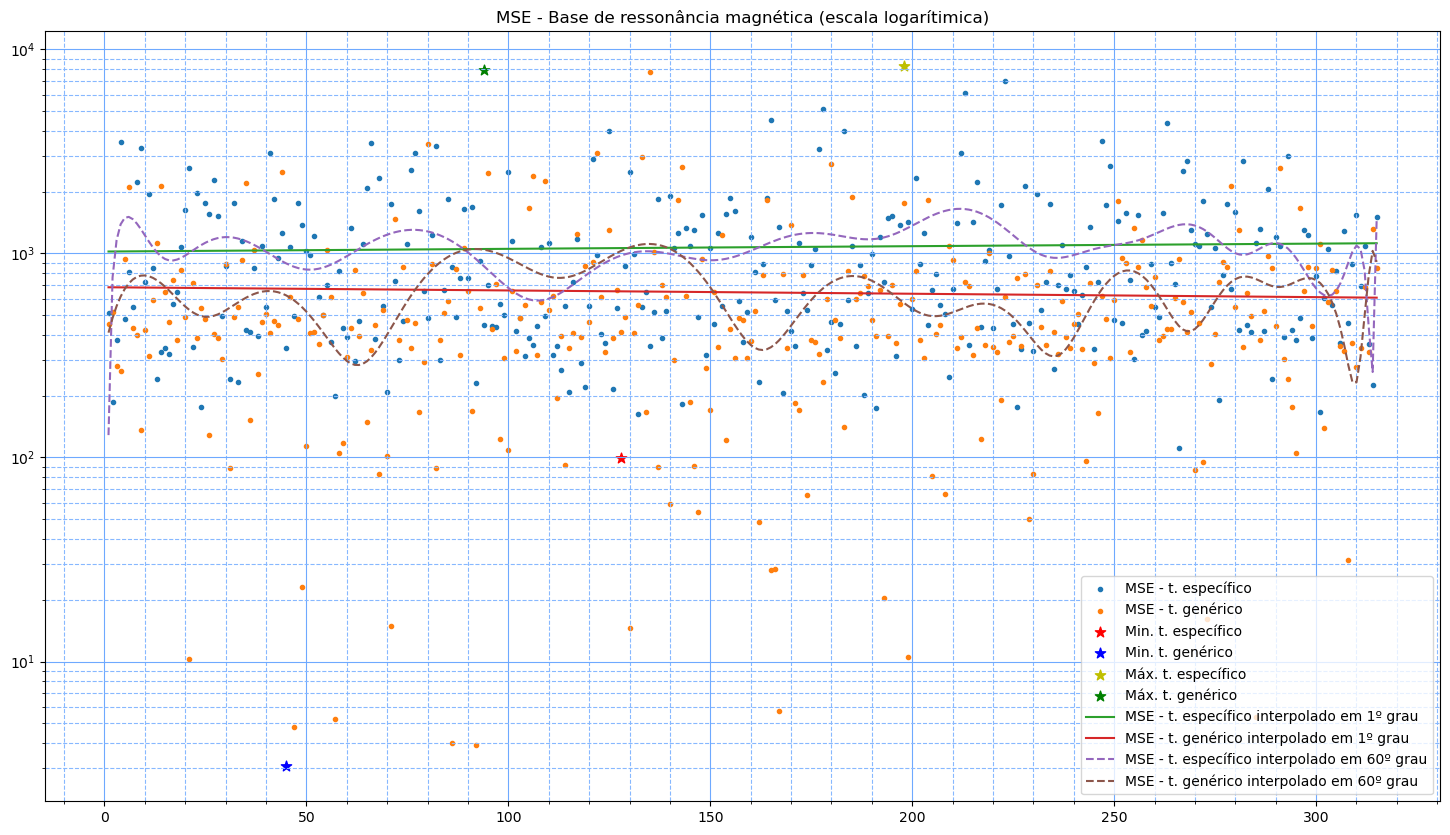

In [170]:
"""
MSE - MRI
"""

plt.figure(figsize=(18,10))

plt.title('MSE - Base de ressonância magnética (escala logarítimica)')

plt.yscale('log')

plt.scatter(df_mri_specific_training['index'], df_mri_specific_training['mse'], marker='.', color='#1f77b4', label='MSE - t. específico')
plt.scatter(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], marker='.', color='#ff7f0e', label='MSE - t. genérico')

min_x_specific_training = np.argmin(df_mri_specific_training['mse']) + 1
min_y_specific_training = np.min(df_mri_specific_training['mse'])

min_x_non_specific_training = np.argmin(df_mri_non_specific_training['mse']) + 1
min_y_non_specific_training = np.min(df_mri_non_specific_training['mse'])

max_x_specific_training = np.argmax(df_mri_specific_training['mse']) + 1
max_y_specific_training = np.max(df_mri_specific_training['mse'])

max_x_non_specific_training = np.argmax(df_mri_non_specific_training['mse']) + 1
max_y_non_specific_training = np.max(df_mri_non_specific_training['mse'])

plt.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=60, c='r', label='Min. t. específico')
plt.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=60, c='b', label='Min. t. genérico')
plt.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=60, c='y', label='Máx. t. específico')
plt.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=60, c='g', label='Máx. t. genérico')

m_mri_specific_training, b_mri_specific_training = np.polyfit(df_mri_specific_training['index'], df_mri_specific_training['mse'], 1)
m_mri_non_specific_training, b_mri_non_specific_training = np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_mri_specific_training = np.poly1d(np.polyfit(df_mri_specific_training['index'], df_mri_specific_training['mse'], 60))
    polynomium_mri_non_specific_training = np.poly1d(np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], 60))

plt.plot(df_mri_specific_training['index'], m_mri_specific_training*df_mri_specific_training['index'] + b_mri_specific_training, color='#2ca02c', label='MSE - t. específico interpolado em 1º grau')
plt.plot(df_mri_non_specific_training['index'], m_mri_non_specific_training*df_mri_non_specific_training['index'] + b_mri_non_specific_training, color='#d62728', label='MSE - t. genérico interpolado em 1º grau')

plt.plot(df_mri_specific_training['index'], polynomium_mri_specific_training(df_mri_specific_training['index']), '--', color='#9467bd', label='MSE - t. específico interpolado em 60º grau')
plt.plot(df_mri_specific_training['index'], polynomium_mri_non_specific_training(df_mri_specific_training['index']), '--', color='#8c564b', label='MSE - t. genérico interpolado em 60º grau')

plt.grid(which='major', color='#6ea9ff', linestyle='-')
plt.grid(which='minor', color='#87b8ff', linestyle='--')

plt.legend(loc="lower right")
plt.minorticks_on()

plt.savefig('mse_mri.svg')

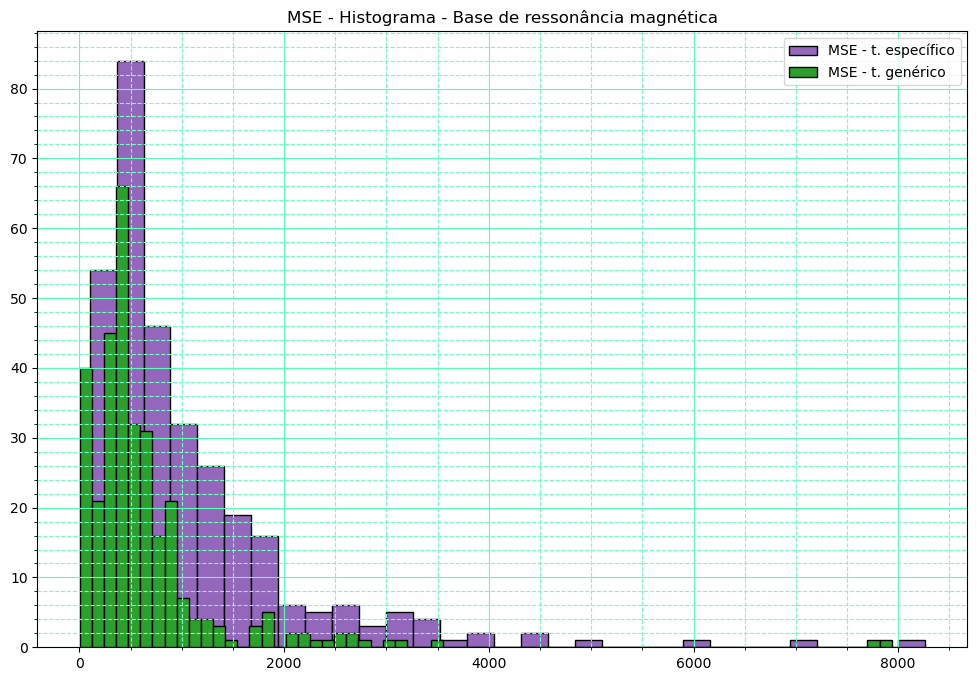

In [156]:
"""
MSE - MRI
"""

plt.figure(figsize=(12,8))

plt.title('MSE - Histograma - Base de ressonância magnética')

# plt.yscale('log')

plt.grid(which='major', color='#59ffb4', linestyle='-')
plt.grid(which='minor', color='#73ffc0', linestyle='--')

plt.minorticks_on()

_ = plt.hist(df_mri_specific_training['mse'], bins='auto', color='#9467bd', label='MSE - t. específico', edgecolor='black')
_ = plt.hist(df_mri_non_specific_training['mse'], bins='auto', color='#2ca02c', label='MSE - t. genérico', edgecolor='black')

plt.legend(loc="upper right")

plt.savefig('mse_mri_hist.svg')

In [116]:
def get_color(i, j):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#fcba03']
    return colors[i * 3 + j]

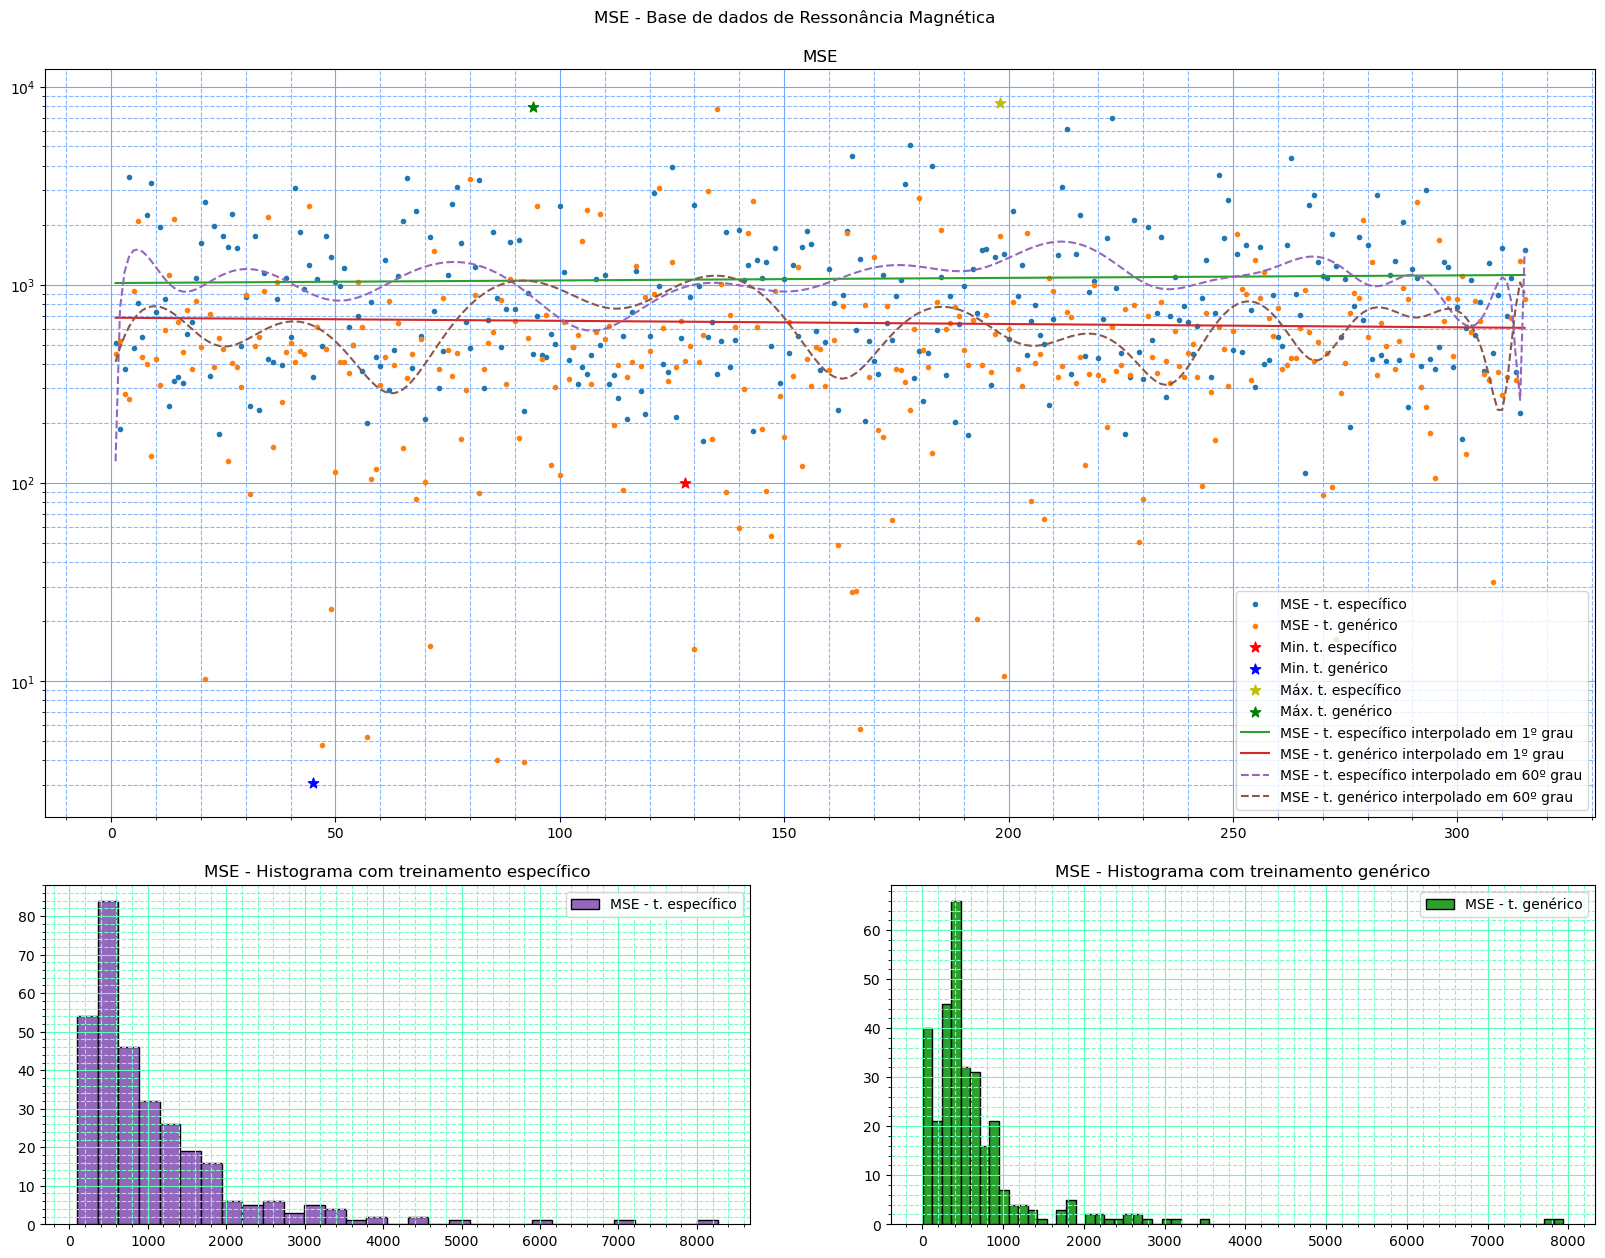

In [173]:
fig = plt.figure(figsize=(20,15))

fig.suptitle('MSE - Base de dados de Ressonância Magnética', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])


# General plot

ax1.set_title('MSE')

ax1.set_yscale("log")

ax1.scatter(df_mri_specific_training['index'], df_mri_specific_training['mse'], marker='.', color='#1f77b4', label='MSE - t. específico')
ax1.scatter(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], marker='.', color='#ff7f0e', label='MSE - t. genérico')

min_x_specific_training = np.argmin(df_mri_specific_training['mse']) + 1
min_y_specific_training = np.min(df_mri_specific_training['mse'])

min_x_non_specific_training = np.argmin(df_mri_non_specific_training['mse']) + 1
min_y_non_specific_training = np.min(df_mri_non_specific_training['mse'])

max_x_specific_training = np.argmax(df_mri_specific_training['mse']) + 1
max_y_specific_training = np.max(df_mri_specific_training['mse'])

max_x_non_specific_training = np.argmax(df_mri_non_specific_training['mse']) + 1
max_y_non_specific_training = np.max(df_mri_non_specific_training['mse'])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=60, c='r', label='Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=60, c='b', label='Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=60, c='y', label='Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=60, c='g', label='Máx. t. genérico')

m_mri_specific_training, b_mri_specific_training = np.polyfit(df_mri_specific_training['index'], df_mri_specific_training['mse'], 1)
m_mri_non_specific_training, b_mri_non_specific_training = np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_mri_specific_training = np.poly1d(np.polyfit(df_mri_specific_training['index'], df_mri_specific_training['mse'], 60))
    polynomium_mri_non_specific_training = np.poly1d(np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], 60))

ax1.plot(df_mri_specific_training['index'], m_mri_specific_training*df_mri_specific_training['index'] + b_mri_specific_training, color='#2ca02c', label='MSE - t. específico interpolado em 1º grau')
ax1.plot(df_mri_non_specific_training['index'], m_mri_non_specific_training*df_mri_non_specific_training['index'] + b_mri_non_specific_training, color='#d62728', label='MSE - t. genérico interpolado em 1º grau')

ax1.plot(df_mri_specific_training['index'], polynomium_mri_specific_training(df_mri_specific_training['index']), '--', color='#9467bd', label='MSE - t. específico interpolado em 60º grau')
ax1.plot(df_mri_specific_training['index'], polynomium_mri_non_specific_training(df_mri_specific_training['index']), '--', color='#8c564b', label='MSE - t. genérico interpolado em 60º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('MSE - Histograma com treinamento específico')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_mri_specific_training['mse'], bins='auto', color='#9467bd', label='MSE - t. específico', edgecolor='black')

ax2.legend(loc="upper right")





# Histogram generic training

ax3.set_title('MSE - Histograma com treinamento genérico')

ax3.grid(which='major', color='#59ffb4', linestyle='-')
ax3.grid(which='minor', color='#73ffc0', linestyle='--')

ax3.minorticks_on()

_ = ax3.hist(df_mri_non_specific_training['mse'], bins='auto', color='#2ca02c', label='MSE - t. genérico', edgecolor='black')

ax3.legend(loc="upper right")

plt.show()

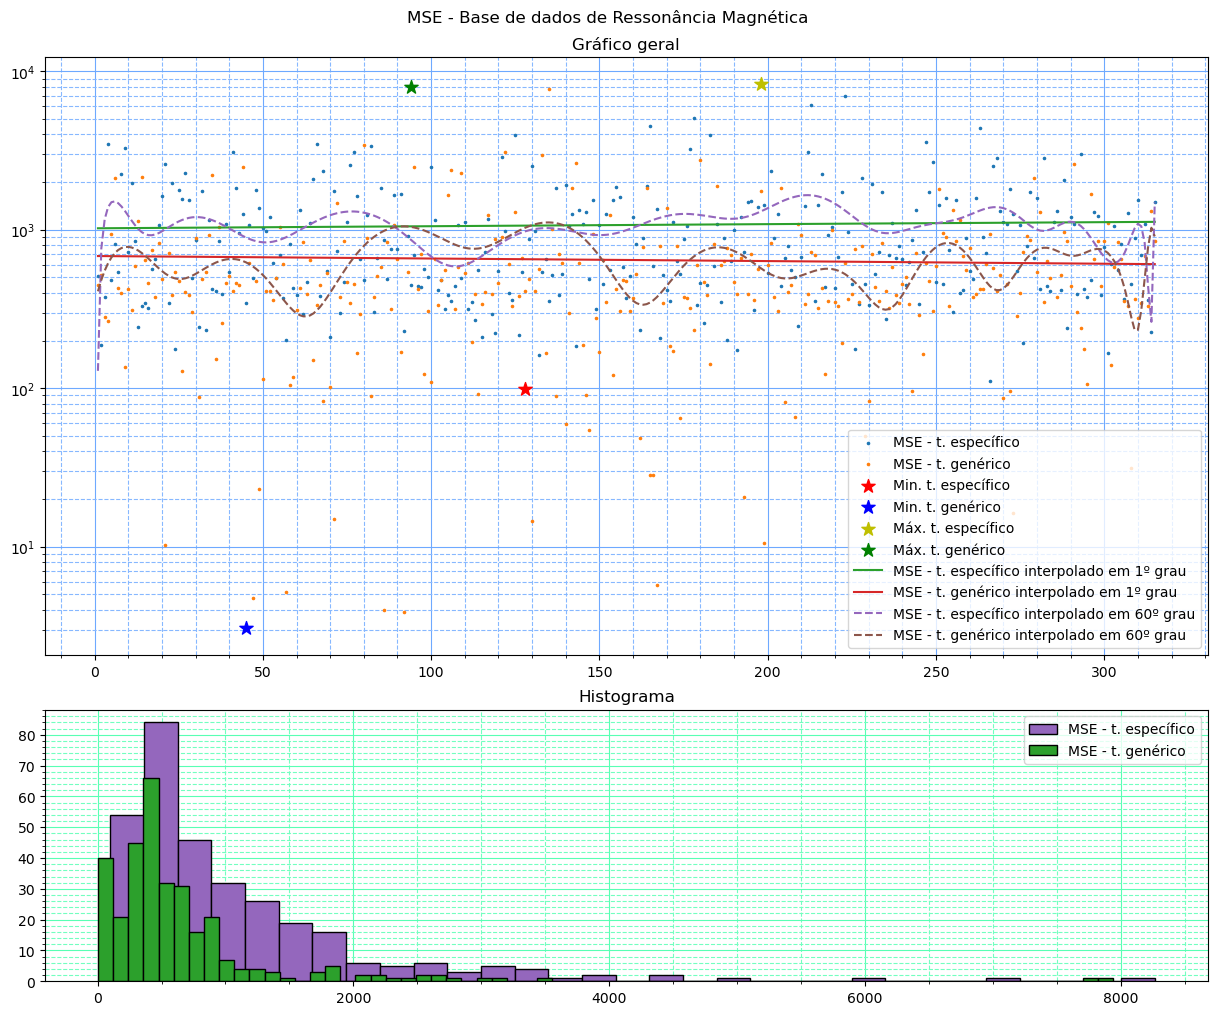

In [185]:
# MSE - MRI

size_tick_min_max = 100

fig = plt.figure(figsize=(15,12))

fig.suptitle('MSE - Base de dados de Ressonância Magnética', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_mri_specific_training['index'], df_mri_specific_training['mse'], marker='.', s=10, color='#1f77b4', label='MSE - t. específico')
ax1.scatter(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], marker='.', s=10, color='#ff7f0e', label='MSE - t. genérico')

min_x_specific_training = np.argmin(df_mri_specific_training['mse']) + 1
min_y_specific_training = np.min(df_mri_specific_training['mse'])

min_x_non_specific_training = np.argmin(df_mri_non_specific_training['mse']) + 1
min_y_non_specific_training = np.min(df_mri_non_specific_training['mse'])

max_x_specific_training = np.argmax(df_mri_specific_training['mse']) + 1
max_y_specific_training = np.max(df_mri_specific_training['mse'])

max_x_non_specific_training = np.argmax(df_mri_non_specific_training['mse']) + 1
max_y_non_specific_training = np.max(df_mri_non_specific_training['mse'])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='Máx. t. genérico')

m_mri_specific_training, b_mri_specific_training = np.polyfit(df_mri_specific_training['index'], df_mri_specific_training['mse'], 1)
m_mri_non_specific_training, b_mri_non_specific_training = np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_mri_specific_training = np.poly1d(np.polyfit(df_mri_specific_training['index'], df_mri_specific_training['mse'], 60))
    polynomium_mri_non_specific_training = np.poly1d(np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training['mse'], 60))

ax1.plot(df_mri_specific_training['index'], m_mri_specific_training*df_mri_specific_training['index'] + b_mri_specific_training, color='#2ca02c', label='MSE - t. específico interpolado em 1º grau')
ax1.plot(df_mri_non_specific_training['index'], m_mri_non_specific_training*df_mri_non_specific_training['index'] + b_mri_non_specific_training, color='#d62728', label='MSE - t. genérico interpolado em 1º grau')

ax1.plot(df_mri_specific_training['index'], polynomium_mri_specific_training(df_mri_specific_training['index']), '--', color='#9467bd', label='MSE - t. específico interpolado em 60º grau')
ax1.plot(df_mri_specific_training['index'], polynomium_mri_non_specific_training(df_mri_specific_training['index']), '--', color='#8c564b', label='MSE - t. genérico interpolado em 60º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_mri_specific_training['mse'], bins='auto', color='#9467bd', label='MSE - t. específico', edgecolor='black')
_ = ax2.hist(df_mri_non_specific_training['mse'], bins='auto', color='#2ca02c', label='MSE - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('mse_mri_compound.svg')
plt.savefig('mse_mri_compound.pdf')

plt.show()

In [176]:
fig, axs = plt.subplots(3, 3)

# fig.set_figwidth(30)
# fig.set_figheight(20)

fig.set_figwidth(15)
fig.set_figheight(15)

fig.suptitle('Base de dados de Ressonância Magnética treinada de forma especializada')
fig.tight_layout()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

for i in range(3):
    for j in range(3):
        axs[i, j].set_title(str(algorithms[i * 3 + j]).upper() + ' )


for i in range(3):
    for j in range(3):
        x_data = df_mri['img_name']
        y_data = df_mri[algorithms[i * 3 + j]]
        axs[i, j].scatter(x_data, y_data, marker='.', color=get_color(i, j))
        axs[i, j].set_xticks([])
        axs[i, j].grid()

SyntaxError: unterminated string literal (detected at line 15) (3510726515.py, line 15)

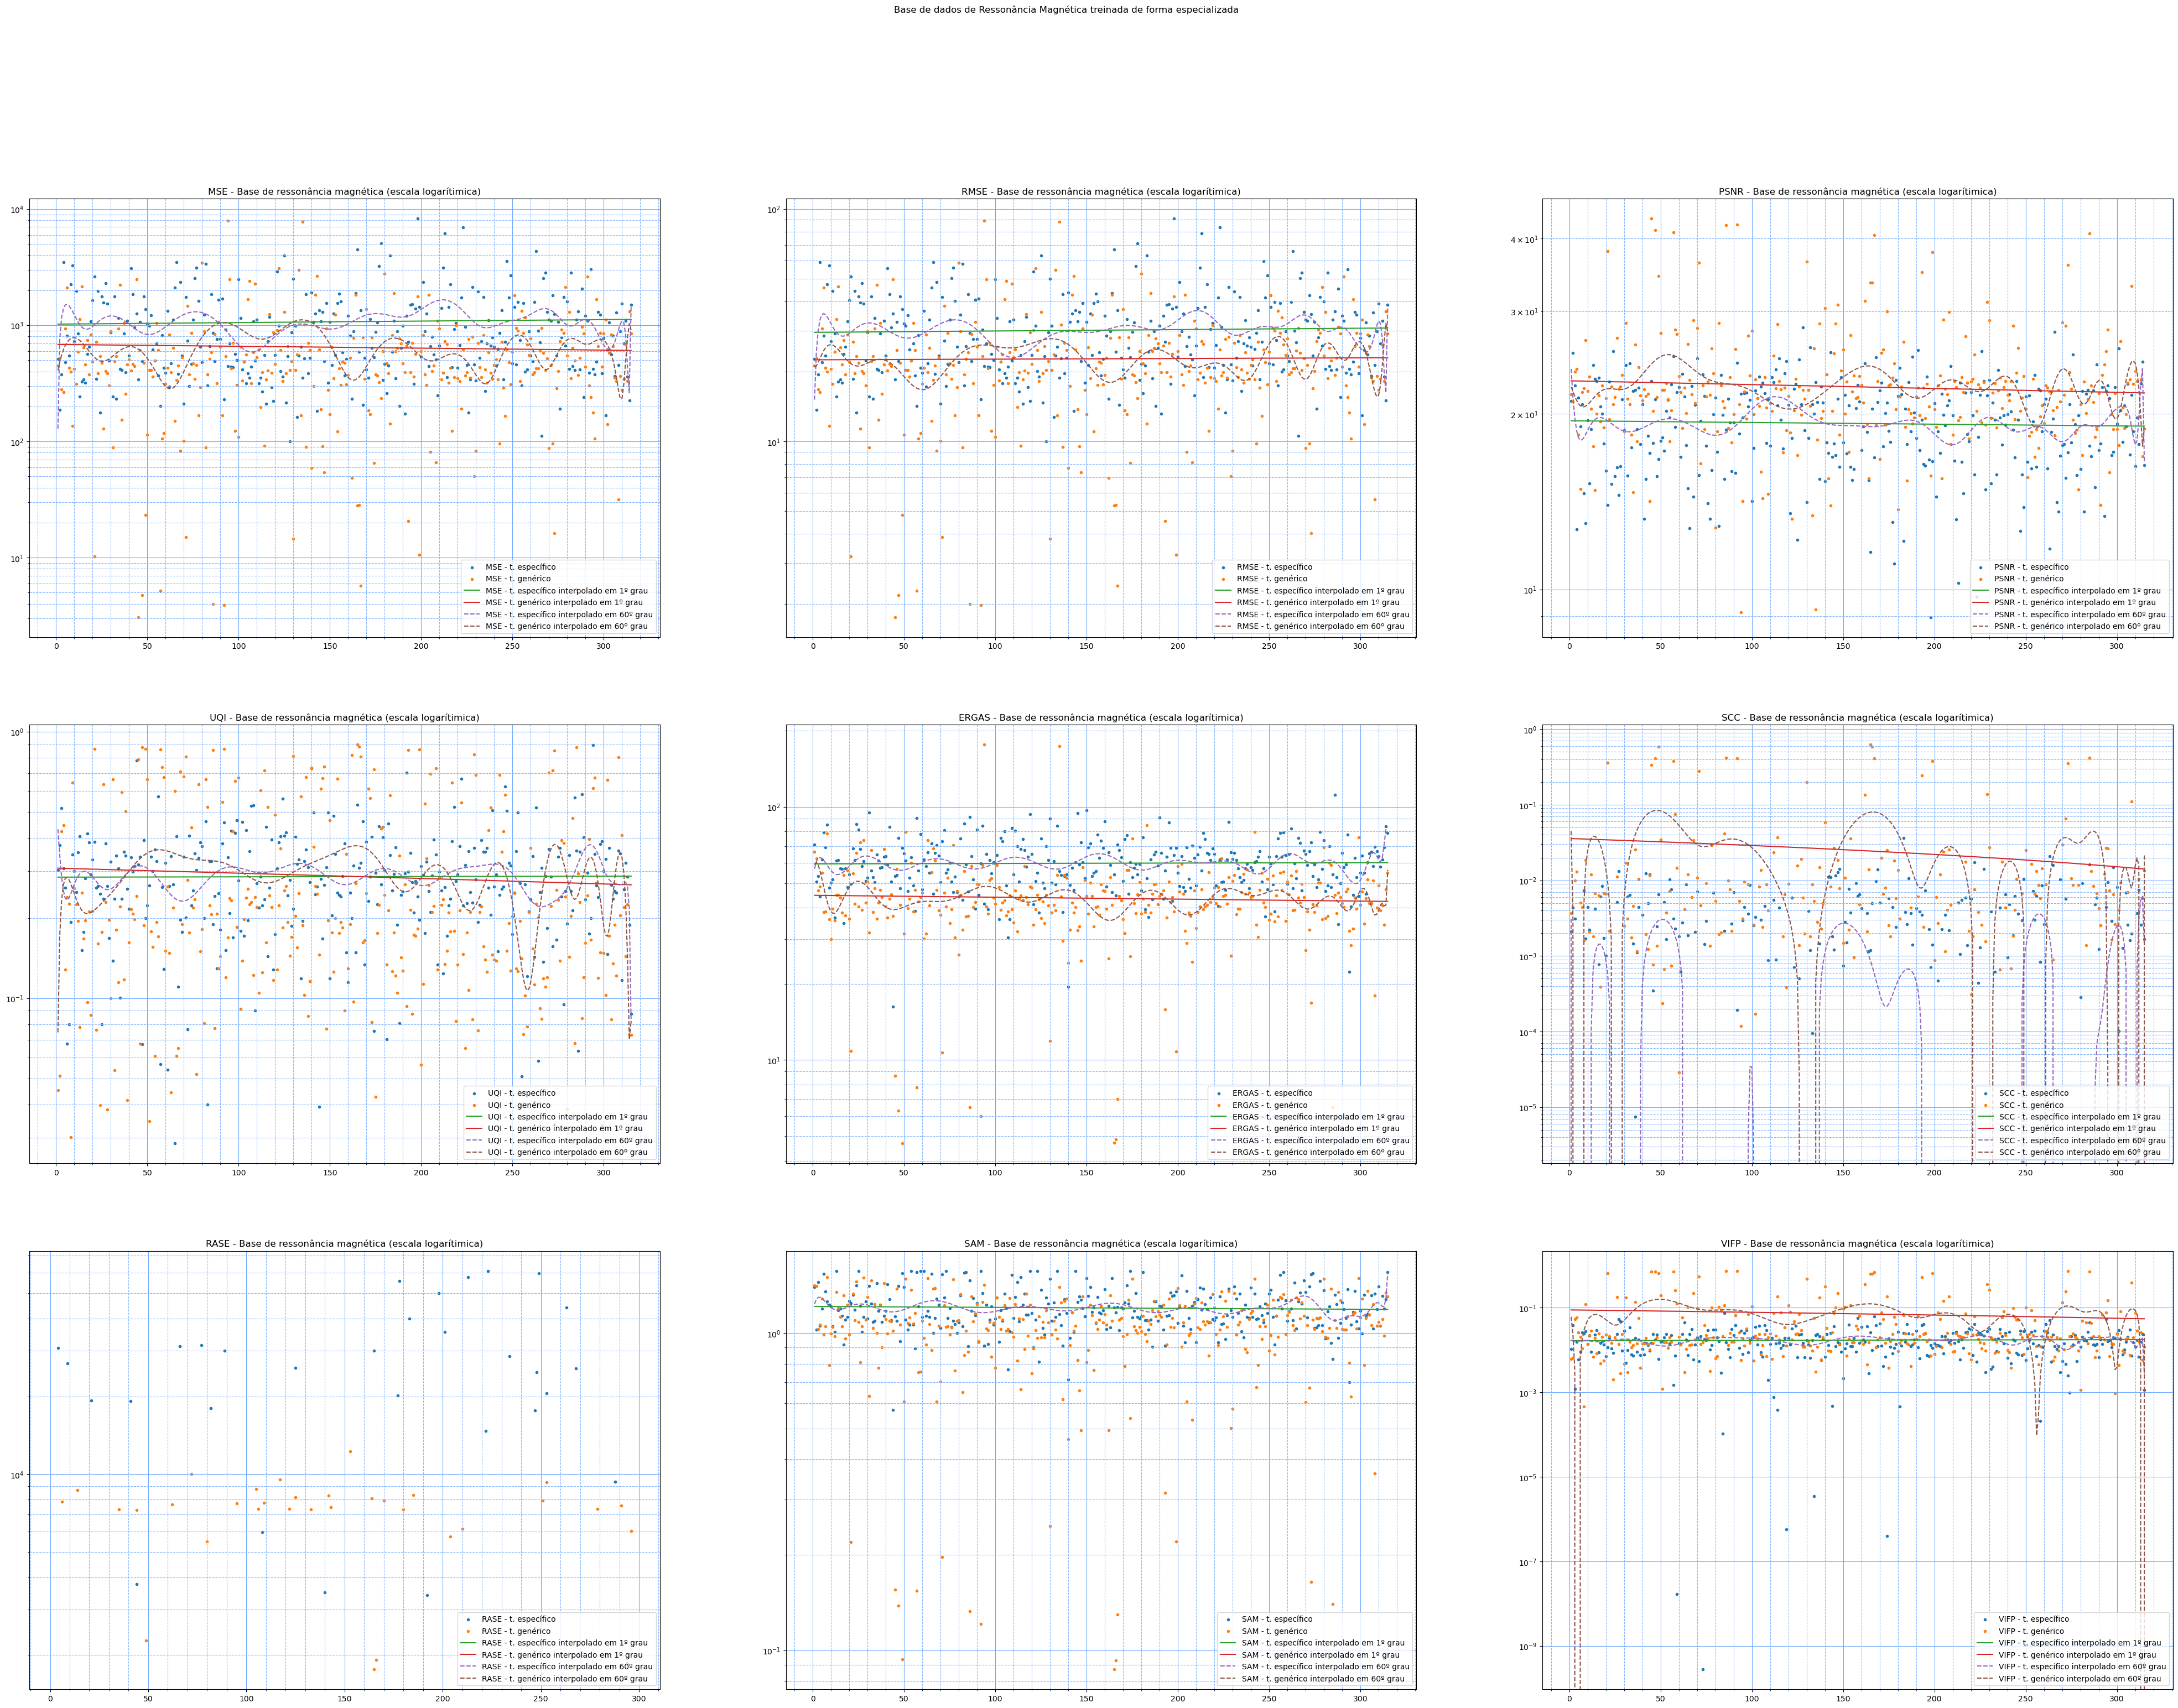

In [102]:
fig, axs = plt.subplots(3, 3)

# fig.set_figwidth(30)
# fig.set_figheight(20)

fig.set_figwidth(50)
fig.set_figheight(35)

fig.suptitle('Base de dados de Ressonância Magnética treinada de forma especializada')
# fig.tight_layout()
# fig.tight_layout(rect=[1, 1, 1, 0.95])

for i in range(3):
    for j in range(3):
        axs[i, j].set_title(str(algorithms[i * 3 + j]).upper() + ' - Base de ressonância magnética (escala logarítimica)')


for i in range(3):
    for j in range(3):
        alg = algorithms[i * 3 + j]

        axs[i, j].set_yscale("log")

        axs[i, j].scatter(df_mri_specific_training['index'], df_mri_specific_training[alg], marker='.', color='#1f77b4', label=str(algorithms[i * 3 + j]).upper() + ' - t. específico')
        axs[i, j].scatter(df_mri_non_specific_training['index'], df_mri_non_specific_training[alg], marker='.', color='#ff7f0e', label=str(algorithms[i * 3 + j]).upper() + ' - t. genérico')
        
        m_mri_specific_training, b_mri_specific_training = np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[alg], 1)
        m_mri_non_specific_training, b_mri_non_specific_training = np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[alg], 1)

        with warnings.catch_warnings():
            warnings.simplefilter('ignore', np.RankWarning)
            polynomium_mri_specific_training = np.poly1d(np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[alg], 60))
            polynomium_mri_non_specific_training = np.poly1d(np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[alg], 60))

        axs[i, j].plot(df_mri_specific_training['index'], m_mri_specific_training*df_mri_specific_training['index'] + b_mri_specific_training, color='#2ca02c', label=str(algorithms[i * 3 + j]).upper() + ' - t. específico interpolado em 1º grau')
        axs[i, j].plot(df_mri_non_specific_training['index'], m_mri_non_specific_training*df_mri_non_specific_training['index'] + b_mri_non_specific_training, color='#d62728', label=str(algorithms[i * 3 + j]).upper() + ' - t. genérico interpolado em 1º grau')

        axs[i, j].plot(df_mri_specific_training['index'], polynomium_mri_specific_training(df_mri_specific_training['index']), '--', color='#9467bd', label=str(algorithms[i * 3 + j]).upper() + ' - t. específico interpolado em 60º grau')
        axs[i, j].plot(df_mri_specific_training['index'], polynomium_mri_non_specific_training(df_mri_specific_training['index']), '--', color='#8c564b', label=str(algorithms[i * 3 + j]).upper() + ' - t. genérico interpolado em 60º grau')

        axs[i, j].grid(which='major', color='#6ea9ff', linestyle='-')
        axs[i, j].grid(which='minor', color='#87b8ff', linestyle='--')

        axs[i, j].legend(loc="lower right")
        axs[i, j].minorticks_on()

plt.savefig('mri.pdf')

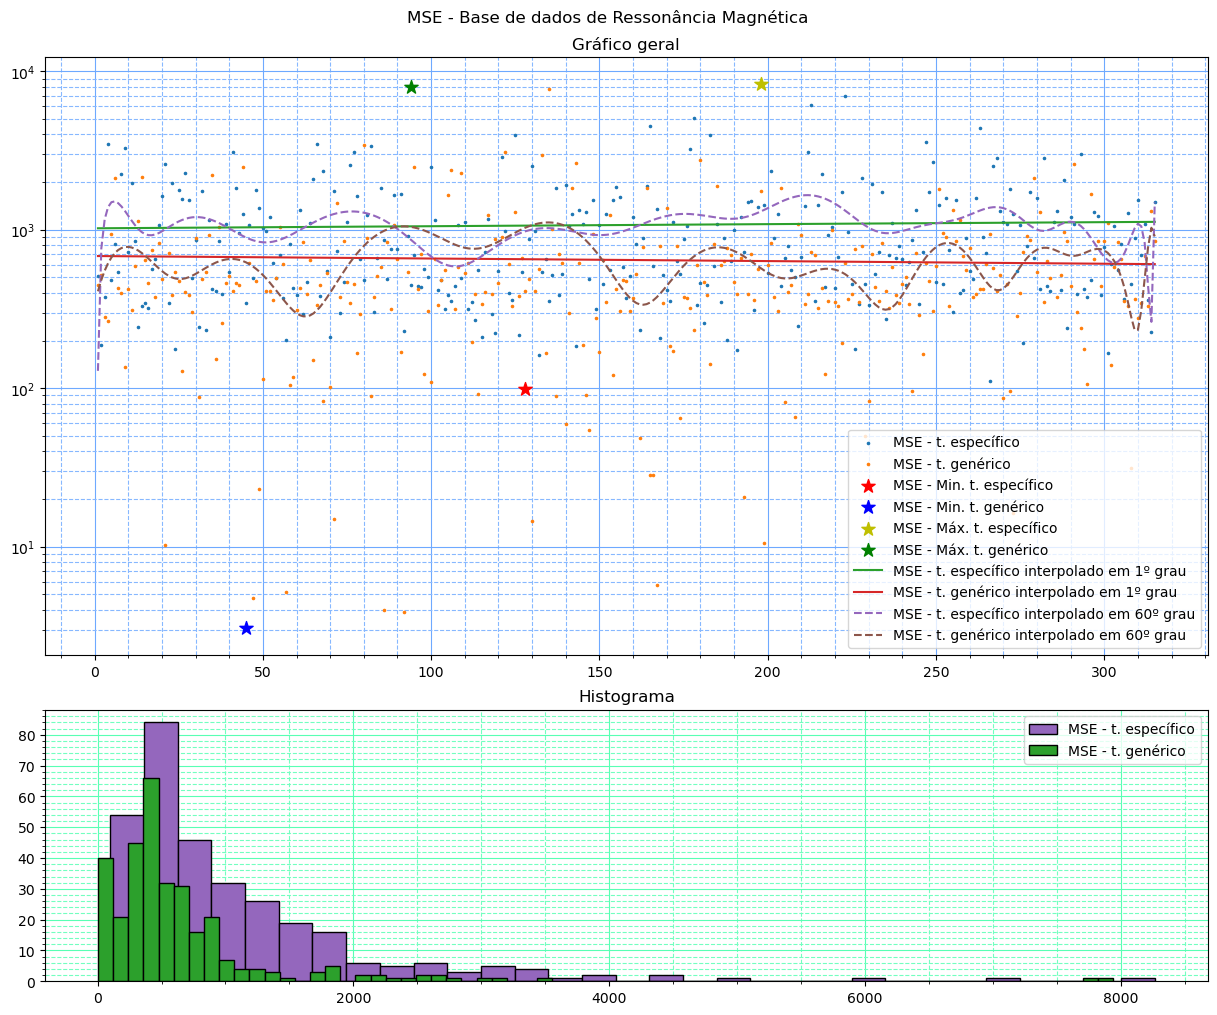

In [204]:
# MSE - MRI

key = 'mse'

size_tick_min_max = 100
size_tick_scatter = 10

color_scatter_specific_training = '#1f77b4'
color_scatter_non_specific_training = '#ff7f0e'

color_plot_polynomium_1_deg_specific_training = '#2ca02c'
color_plot_polynomium_1_deg_non_specific_training = '#d62728'

color_plot_polynomium_60_deg_specific_training = '#9467bd'
color_plot_polynomium_60_deg_non_specific_training = '#8c564b'

color_histogram_specific_training = '#9467bd'
color_histogram_non_specific_training = '#2ca02c'


fig = plt.figure(figsize=(15,12))

fig.suptitle('MSE - Base de dados de Ressonância Magnética', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_mri_specific_training['index'], df_mri_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_specific_training, label='MSE - t. específico')
ax1.scatter(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_non_specific_training, label='MSE - t. genérico')

min_x_specific_training = np.argmin(df_mri_specific_training[key]) + 1
min_y_specific_training = np.min(df_mri_specific_training[key])

min_x_non_specific_training = np.argmin(df_mri_non_specific_training[key]) + 1
min_y_non_specific_training = np.min(df_mri_non_specific_training[key])

max_x_specific_training = np.argmax(df_mri_specific_training[key]) + 1
max_y_specific_training = np.max(df_mri_specific_training[key])

max_x_non_specific_training = np.argmax(df_mri_non_specific_training[key]) + 1
max_y_non_specific_training = np.max(df_mri_non_specific_training[key])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='MSE - Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='MSE - Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='MSE - Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='MSE - Máx. t. genérico')

m_mri_specific_training, b_mri_specific_training = np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[key], 1)
m_mri_non_specific_training, b_mri_non_specific_training = np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_mri_specific_training = np.poly1d(np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[key], 60))
    polynomium_mri_non_specific_training = np.poly1d(np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], 60))

ax1.plot(df_mri_specific_training['index'], m_mri_specific_training*df_mri_specific_training['index'] + b_mri_specific_training, color=color_plot_polynomium_1_deg_specific_training, label='MSE - t. específico interpolado em 1º grau')
ax1.plot(df_mri_non_specific_training['index'], m_mri_non_specific_training*df_mri_non_specific_training['index'] + b_mri_non_specific_training, color=color_plot_polynomium_1_deg_non_specific_training, label='MSE - t. genérico interpolado em 1º grau')

ax1.plot(df_mri_specific_training['index'], polynomium_mri_specific_training(df_mri_specific_training['index']), '--', color=color_plot_polynomium_60_deg_specific_training, label='MSE - t. específico interpolado em 60º grau')
ax1.plot(df_mri_specific_training['index'], polynomium_mri_non_specific_training(df_mri_specific_training['index']), '--', color=color_plot_polynomium_60_deg_non_specific_training, label='MSE - t. genérico interpolado em 60º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_mri_specific_training[key], bins='auto', color=color_histogram_specific_training, label='MSE - t. específico', edgecolor='black')
_ = ax2.hist(df_mri_non_specific_training[key], bins='auto', color=color_histogram_non_specific_training, label='MSE - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('mse_mri_compound.svg')
plt.savefig('mse_mri_compound.pdf')

plt.show()

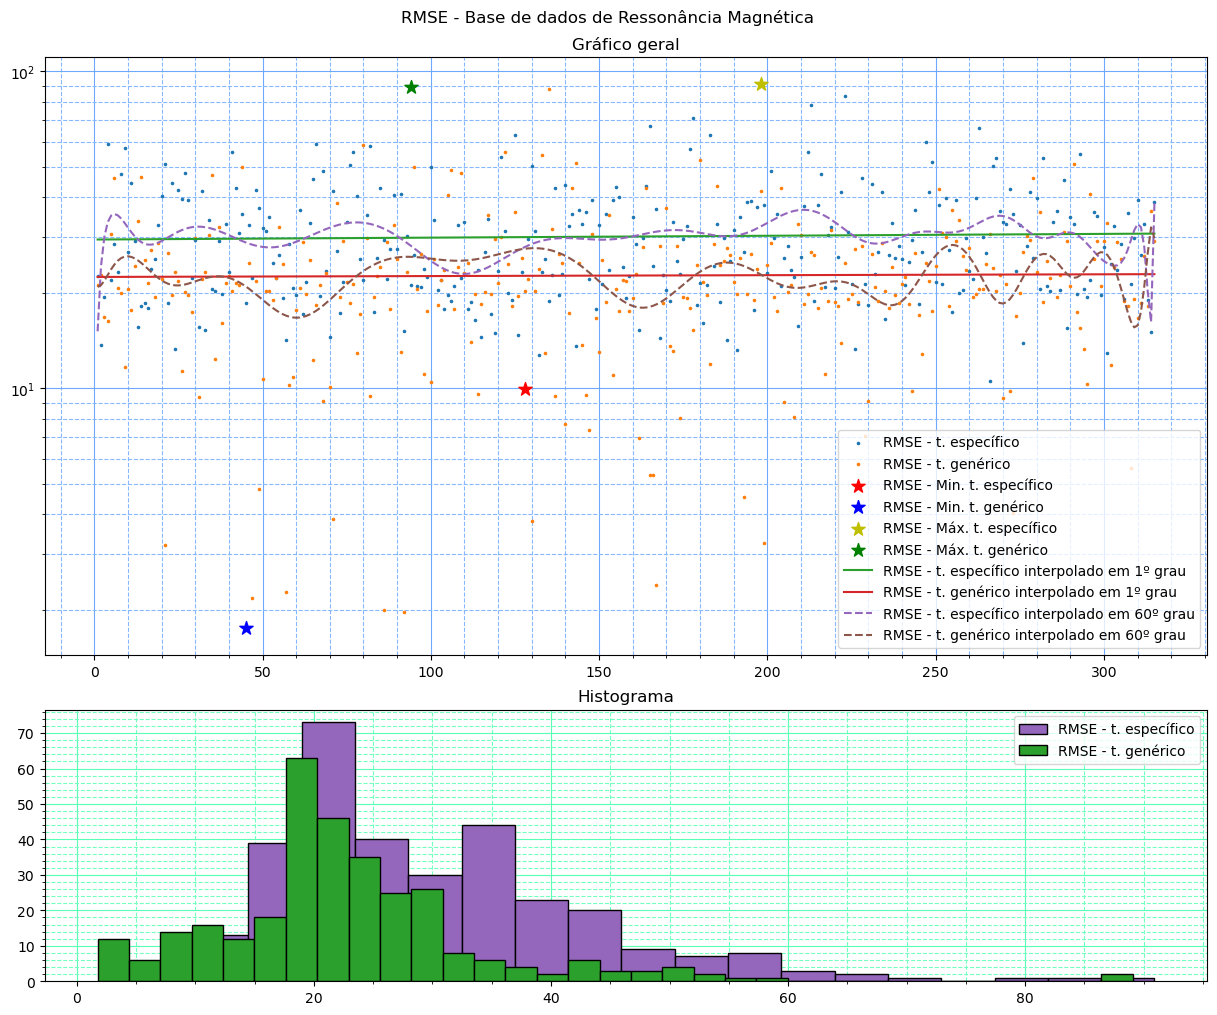

In [205]:
# RMSE - MRI

key = 'rmse'

size_tick_min_max = 100
size_tick_scatter = 10

color_scatter_specific_training = '#1f77b4'
color_scatter_non_specific_training = '#ff7f0e'

color_plot_polynomium_1_deg_specific_training = '#2ca02c'
color_plot_polynomium_1_deg_non_specific_training = '#d62728'

color_plot_polynomium_60_deg_specific_training = '#9467bd'
color_plot_polynomium_60_deg_non_specific_training = '#8c564b'

color_histogram_specific_training = '#9467bd'
color_histogram_non_specific_training = '#2ca02c'


fig = plt.figure(figsize=(15,12))

fig.suptitle('RMSE - Base de dados de Ressonância Magnética', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_mri_specific_training['index'], df_mri_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_specific_training, label='RMSE - t. específico')
ax1.scatter(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_non_specific_training, label='RMSE - t. genérico')

min_x_specific_training = np.argmin(df_mri_specific_training[key]) + 1
min_y_specific_training = np.min(df_mri_specific_training[key])

min_x_non_specific_training = np.argmin(df_mri_non_specific_training[key]) + 1
min_y_non_specific_training = np.min(df_mri_non_specific_training[key])

max_x_specific_training = np.argmax(df_mri_specific_training[key]) + 1
max_y_specific_training = np.max(df_mri_specific_training[key])

max_x_non_specific_training = np.argmax(df_mri_non_specific_training[key]) + 1
max_y_non_specific_training = np.max(df_mri_non_specific_training[key])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='RMSE - Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='RMSE - Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='RMSE - Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='RMSE - Máx. t. genérico')

m_mri_specific_training, b_mri_specific_training = np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[key], 1)
m_mri_non_specific_training, b_mri_non_specific_training = np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_mri_specific_training = np.poly1d(np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[key], 60))
    polynomium_mri_non_specific_training = np.poly1d(np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], 60))

ax1.plot(df_mri_specific_training['index'], m_mri_specific_training*df_mri_specific_training['index'] + b_mri_specific_training, color=color_plot_polynomium_1_deg_specific_training, label='RMSE - t. específico interpolado em 1º grau')
ax1.plot(df_mri_non_specific_training['index'], m_mri_non_specific_training*df_mri_non_specific_training['index'] + b_mri_non_specific_training, color=color_plot_polynomium_1_deg_non_specific_training, label='RMSE - t. genérico interpolado em 1º grau')

ax1.plot(df_mri_specific_training['index'], polynomium_mri_specific_training(df_mri_specific_training['index']), '--', color=color_plot_polynomium_60_deg_specific_training, label='RMSE - t. específico interpolado em 60º grau')
ax1.plot(df_mri_specific_training['index'], polynomium_mri_non_specific_training(df_mri_specific_training['index']), '--', color=color_plot_polynomium_60_deg_non_specific_training, label='RMSE - t. genérico interpolado em 60º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_mri_specific_training[key], bins='auto', color=color_histogram_specific_training, label='RMSE - t. específico', edgecolor='black')
_ = ax2.hist(df_mri_non_specific_training[key], bins='auto', color=color_histogram_non_specific_training, label='RMSE - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('rmse_mri_compound.svg')
plt.savefig('rmse_mri_compound.pdf')

plt.show()

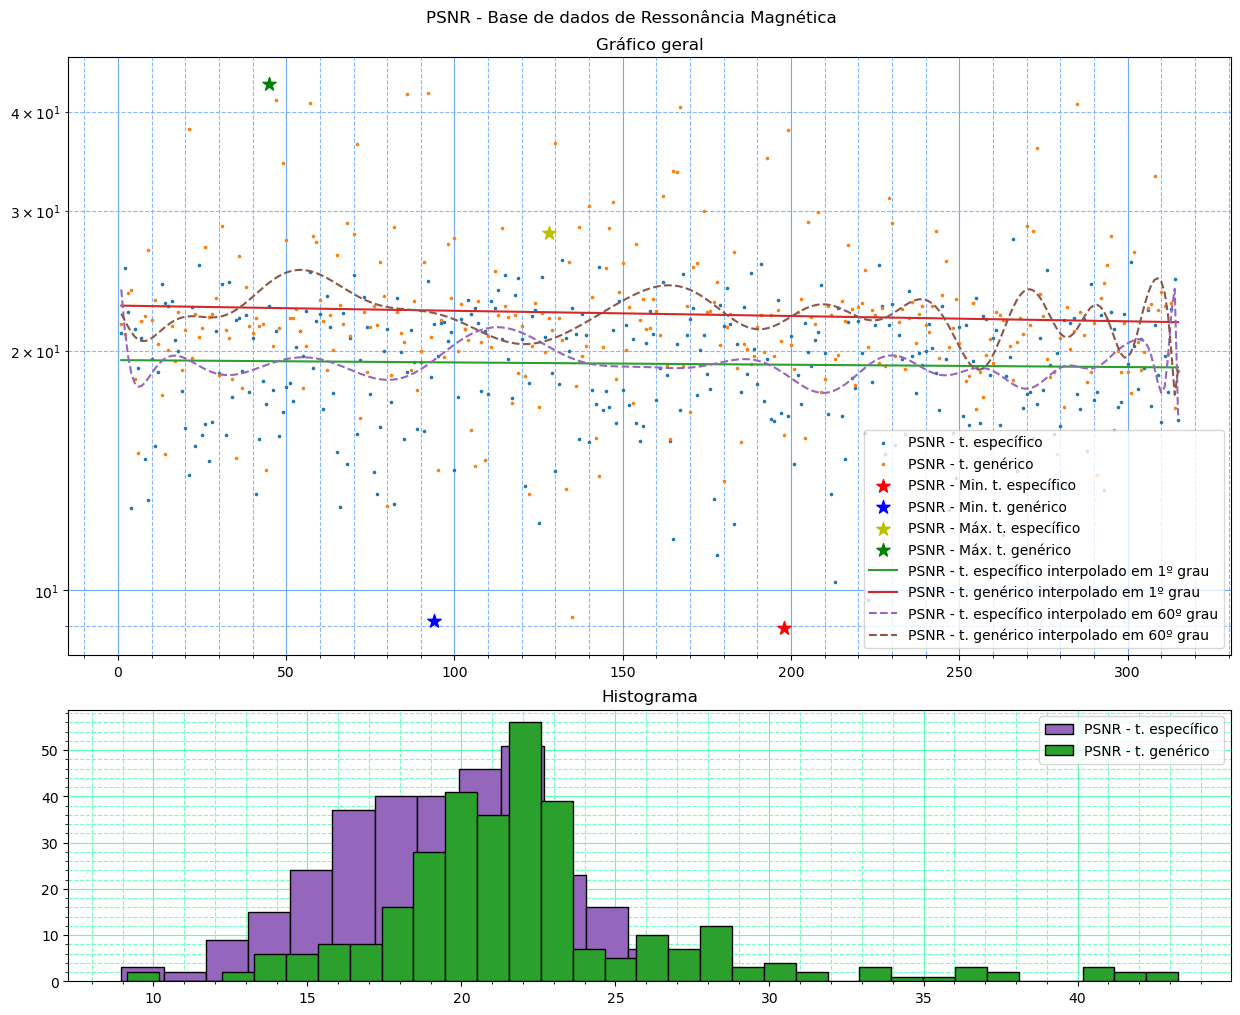

In [206]:
# PSNR - MRI

key = 'psnr'

size_tick_min_max = 100
size_tick_scatter = 10

color_scatter_specific_training = '#1f77b4'
color_scatter_non_specific_training = '#ff7f0e'

color_plot_polynomium_1_deg_specific_training = '#2ca02c'
color_plot_polynomium_1_deg_non_specific_training = '#d62728'

color_plot_polynomium_60_deg_specific_training = '#9467bd'
color_plot_polynomium_60_deg_non_specific_training = '#8c564b'

color_histogram_specific_training = '#9467bd'
color_histogram_non_specific_training = '#2ca02c'


fig = plt.figure(figsize=(15,12))

fig.suptitle('PSNR - Base de dados de Ressonância Magnética', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_mri_specific_training['index'], df_mri_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_specific_training, label='PSNR - t. específico')
ax1.scatter(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_non_specific_training, label='PSNR - t. genérico')

min_x_specific_training = np.argmin(df_mri_specific_training[key]) + 1
min_y_specific_training = np.min(df_mri_specific_training[key])

min_x_non_specific_training = np.argmin(df_mri_non_specific_training[key]) + 1
min_y_non_specific_training = np.min(df_mri_non_specific_training[key])

max_x_specific_training = np.argmax(df_mri_specific_training[key]) + 1
max_y_specific_training = np.max(df_mri_specific_training[key])

max_x_non_specific_training = np.argmax(df_mri_non_specific_training[key]) + 1
max_y_non_specific_training = np.max(df_mri_non_specific_training[key])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='PSNR - Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='PSNR - Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='PSNR - Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='PSNR - Máx. t. genérico')

m_mri_specific_training, b_mri_specific_training = np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[key], 1)
m_mri_non_specific_training, b_mri_non_specific_training = np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_mri_specific_training = np.poly1d(np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[key], 60))
    polynomium_mri_non_specific_training = np.poly1d(np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], 60))

ax1.plot(df_mri_specific_training['index'], m_mri_specific_training*df_mri_specific_training['index'] + b_mri_specific_training, color=color_plot_polynomium_1_deg_specific_training, label='PSNR - t. específico interpolado em 1º grau')
ax1.plot(df_mri_non_specific_training['index'], m_mri_non_specific_training*df_mri_non_specific_training['index'] + b_mri_non_specific_training, color=color_plot_polynomium_1_deg_non_specific_training, label='PSNR - t. genérico interpolado em 1º grau')

ax1.plot(df_mri_specific_training['index'], polynomium_mri_specific_training(df_mri_specific_training['index']), '--', color=color_plot_polynomium_60_deg_specific_training, label='PSNR - t. específico interpolado em 60º grau')
ax1.plot(df_mri_specific_training['index'], polynomium_mri_non_specific_training(df_mri_specific_training['index']), '--', color=color_plot_polynomium_60_deg_non_specific_training, label='PSNR - t. genérico interpolado em 60º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_mri_specific_training[key], bins='auto', color=color_histogram_specific_training, label='PSNR - t. específico', edgecolor='black')
_ = ax2.hist(df_mri_non_specific_training[key], bins='auto', color=color_histogram_non_specific_training, label='PSNR - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('psnr_mri_compound.svg')
plt.savefig('psnr_mri_compound.pdf')

plt.show()

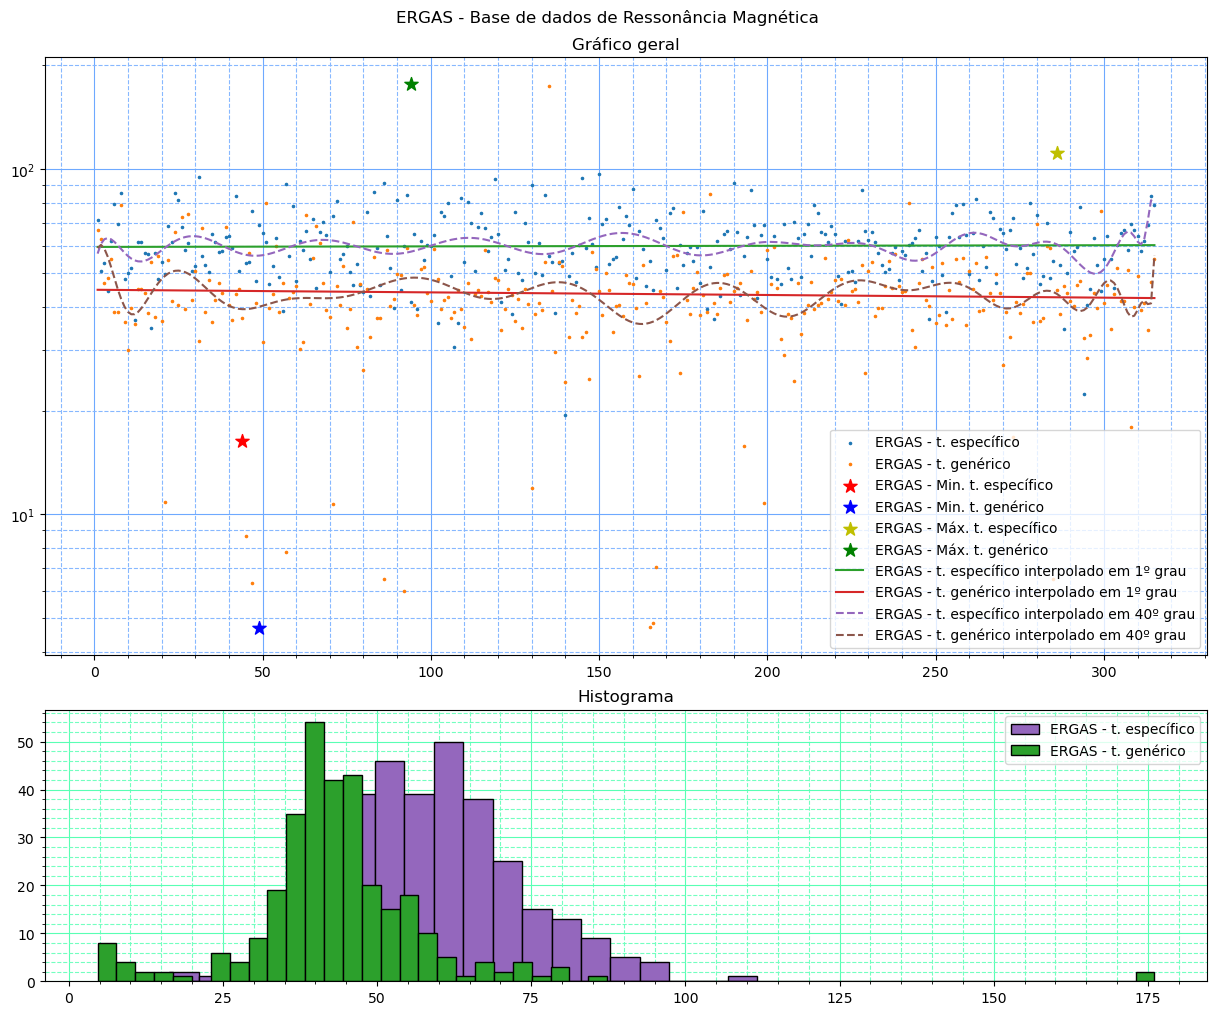

In [49]:
# ERGAS - MRI

key = 'ergas'

size_tick_min_max = 100
size_tick_scatter = 10

color_scatter_specific_training = '#1f77b4'
color_scatter_non_specific_training = '#ff7f0e'

color_plot_polynomium_1_deg_specific_training = '#2ca02c'
color_plot_polynomium_1_deg_non_specific_training = '#d62728'

color_plot_polynomium_60_deg_specific_training = '#9467bd'
color_plot_polynomium_60_deg_non_specific_training = '#8c564b'

color_histogram_specific_training = '#9467bd'
color_histogram_non_specific_training = '#2ca02c'


fig = plt.figure(figsize=(15,12))

fig.suptitle('ERGAS - Base de dados de Ressonância Magnética', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_mri_specific_training['index'], df_mri_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_specific_training, label='ERGAS - t. específico')
ax1.scatter(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_non_specific_training, label='ERGAS - t. genérico')

min_x_specific_training = np.argmin(df_mri_specific_training[key]) + 1
min_y_specific_training = np.min(df_mri_specific_training[key])

min_x_non_specific_training = np.argmin(df_mri_non_specific_training[key]) + 1
min_y_non_specific_training = np.min(df_mri_non_specific_training[key])

max_x_specific_training = np.argmax(df_mri_specific_training[key]) + 1
max_y_specific_training = np.max(df_mri_specific_training[key])

max_x_non_specific_training = np.argmax(df_mri_non_specific_training[key]) + 1
max_y_non_specific_training = np.max(df_mri_non_specific_training[key])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='ERGAS - Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='ERGAS - Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='ERGAS - Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='ERGAS - Máx. t. genérico')

m_mri_specific_training, b_mri_specific_training = np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[key], 1)
m_mri_non_specific_training, b_mri_non_specific_training = np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_mri_specific_training = np.poly1d(np.polyfit(df_mri_specific_training['index'], df_mri_specific_training[key], 60))
    polynomium_mri_non_specific_training = np.poly1d(np.polyfit(df_mri_non_specific_training['index'], df_mri_non_specific_training[key], 60))

ax1.plot(df_mri_specific_training['index'], m_mri_specific_training*df_mri_specific_training['index'] + b_mri_specific_training, color=color_plot_polynomium_1_deg_specific_training, label='ERGAS - t. específico interpolado em 1º grau')
ax1.plot(df_mri_non_specific_training['index'], m_mri_non_specific_training*df_mri_non_specific_training['index'] + b_mri_non_specific_training, color=color_plot_polynomium_1_deg_non_specific_training, label='ERGAS - t. genérico interpolado em 1º grau')

ax1.plot(df_mri_specific_training['index'], polynomium_mri_specific_training(df_mri_specific_training['index']), '--', color=color_plot_polynomium_60_deg_specific_training, label='ERGAS - t. específico interpolado em 40º grau')
ax1.plot(df_mri_specific_training['index'], polynomium_mri_non_specific_training(df_mri_specific_training['index']), '--', color=color_plot_polynomium_60_deg_non_specific_training, label='ERGAS - t. genérico interpolado em 40º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_mri_specific_training[key], bins='auto', color=color_histogram_specific_training, label='ERGAS - t. específico', edgecolor='black')
_ = ax2.hist(df_mri_non_specific_training[key], bins='auto', color=color_histogram_non_specific_training, label='ERGAS - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('ergas_mri_compound.svg')
plt.savefig('ergas_mri_compound.pdf')

plt.show()

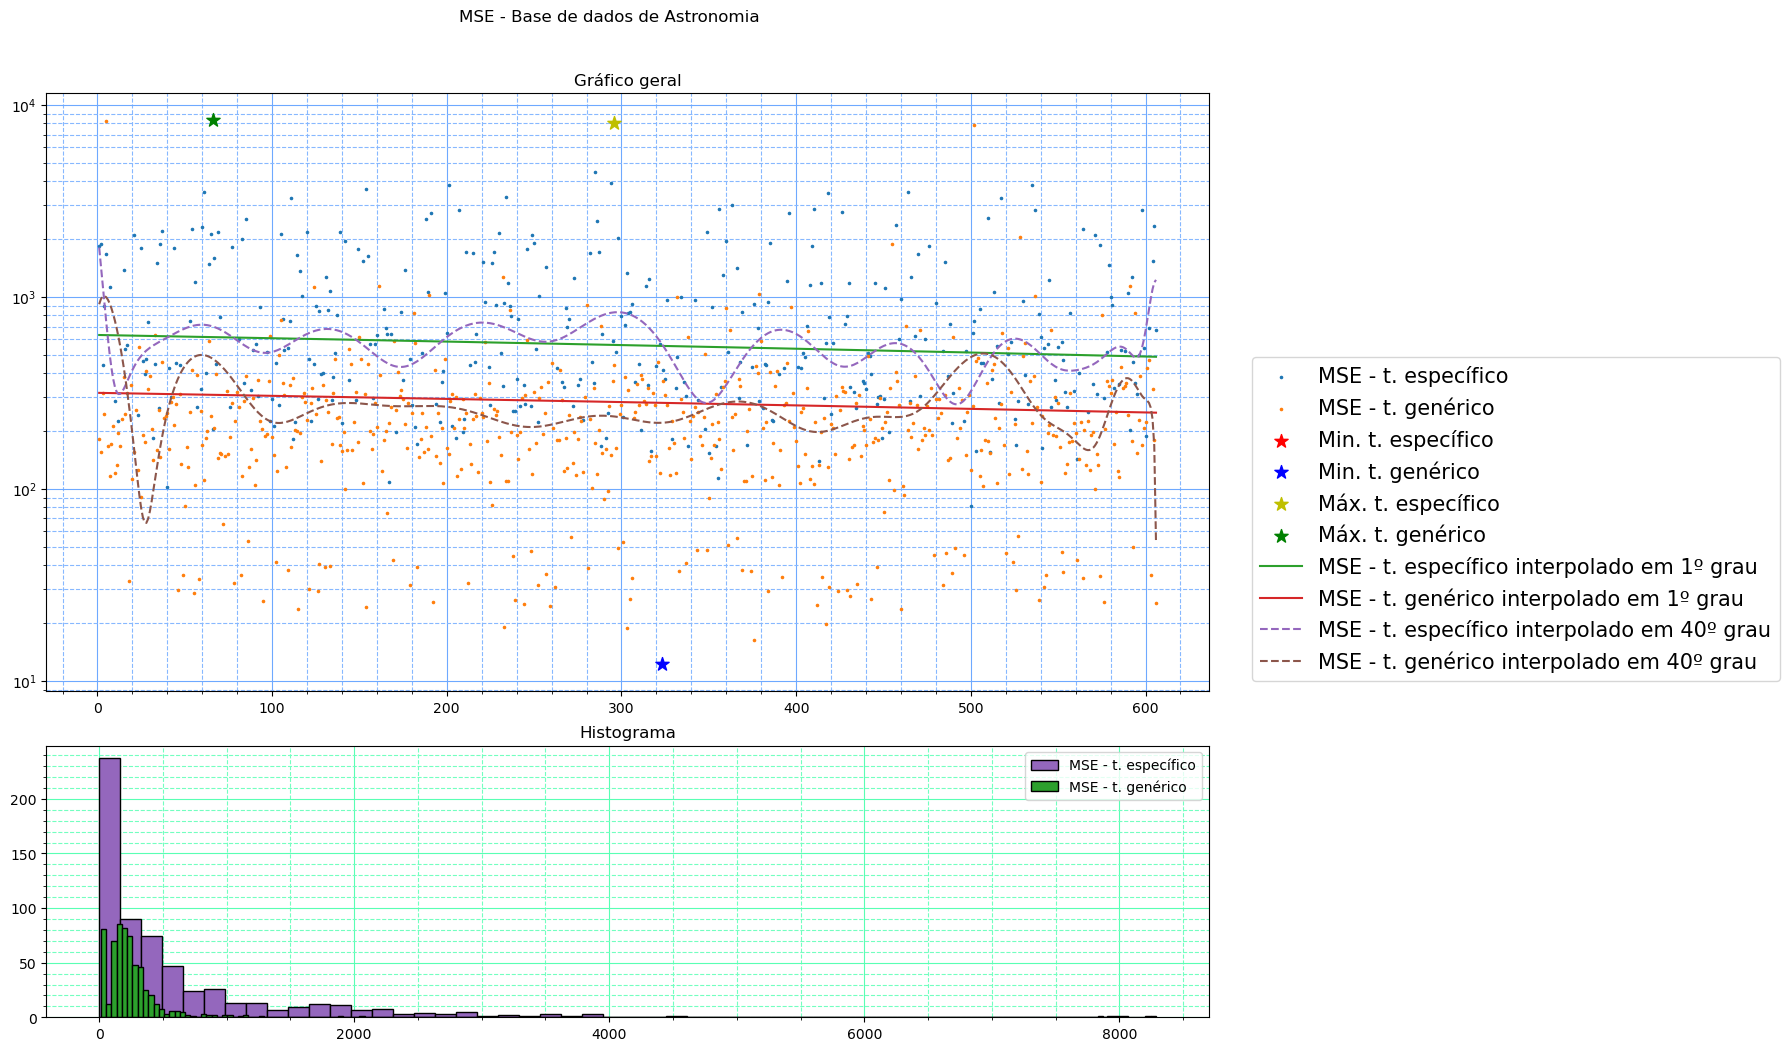

In [76]:
# MSE - Astronomy

key = 'mse'

size_tick_min_max = 100
size_tick_scatter = 10

color_scatter_specific_training = '#1f77b4'
color_scatter_non_specific_training = '#ff7f0e'

color_plot_polynomium_1_deg_specific_training = '#2ca02c'
color_plot_polynomium_1_deg_non_specific_training = '#d62728'

color_plot_polynomium_60_deg_specific_training = '#9467bd'
color_plot_polynomium_60_deg_non_specific_training = '#8c564b'

color_histogram_specific_training = '#9467bd'
color_histogram_non_specific_training = '#2ca02c'


fig = plt.figure(figsize=(15,12))

fig.suptitle('MSE - Base de dados de Astronomia', y=0.95)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_specific_training, label='MSE - t. específico')
ax1.scatter(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_non_specific_training, label='MSE - t. genérico')

min_x_specific_training = np.argmin(df_astronomy_specific_training[key]) + 1
min_y_specific_training = np.min(df_astronomy_specific_training[key])

min_x_non_specific_training = np.argmin(df_astronomy_non_specific_training[key]) + 1
min_y_non_specific_training = np.min(df_astronomy_non_specific_training[key])

max_x_specific_training = np.argmax(df_astronomy_specific_training[key]) + 1
max_y_specific_training = np.max(df_astronomy_specific_training[key])

max_x_non_specific_training = np.argmax(df_astronomy_non_specific_training[key]) + 1
max_y_non_specific_training = np.max(df_astronomy_non_specific_training[key])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='Máx. t. genérico')

m_astronomy_specific_training, b_astronomy_specific_training = np.polyfit(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], 1)
m_astronomy_non_specific_training, b_astronomy_non_specific_training = np.polyfit(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], 1)

# print(m_astronomy_specific_training, b_astronomy_specific_training)
# print(df_astronomy_specific_training['mse'].describe())
# print(df_astronomy_specific_training['mse'])

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_astronomy_specific_training = np.poly1d(np.polyfit(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], 40))
    polynomium_astronomy_non_specific_training = np.poly1d(np.polyfit(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], 40))

ax1.plot(df_astronomy_specific_training['index'], m_astronomy_specific_training*df_astronomy_specific_training['index'] + b_astronomy_specific_training, color=color_plot_polynomium_1_deg_specific_training, label='MSE - t. específico interpolado em 1º grau')
ax1.plot(df_astronomy_non_specific_training['index'], m_astronomy_non_specific_training*df_astronomy_non_specific_training['index'] + b_astronomy_non_specific_training, color=color_plot_polynomium_1_deg_non_specific_training, label='MSE - t. genérico interpolado em 1º grau')

ax1.plot(df_astronomy_specific_training['index'], polynomium_astronomy_specific_training(df_astronomy_specific_training['index']), '--', color=color_plot_polynomium_60_deg_specific_training, label='MSE - t. específico interpolado em 40º grau')
ax1.plot(df_astronomy_non_specific_training['index'], polynomium_astronomy_non_specific_training(df_astronomy_non_specific_training['index']), '--', color=color_plot_polynomium_60_deg_non_specific_training, label='MSE - t. genérico interpolado em 40º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right", bbox_to_anchor=(1.5, 0),prop={'size': 15})
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_astronomy_specific_training[key], bins='auto', color=color_histogram_specific_training, label='MSE - t. específico', edgecolor='black')
_ = ax2.hist(df_astronomy_non_specific_training[key], bins='auto', color=color_histogram_non_specific_training, label='MSE - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('mse_astronomy_compound.svg')
plt.savefig('mse_astronomy_compound.pdf')

plt.show()

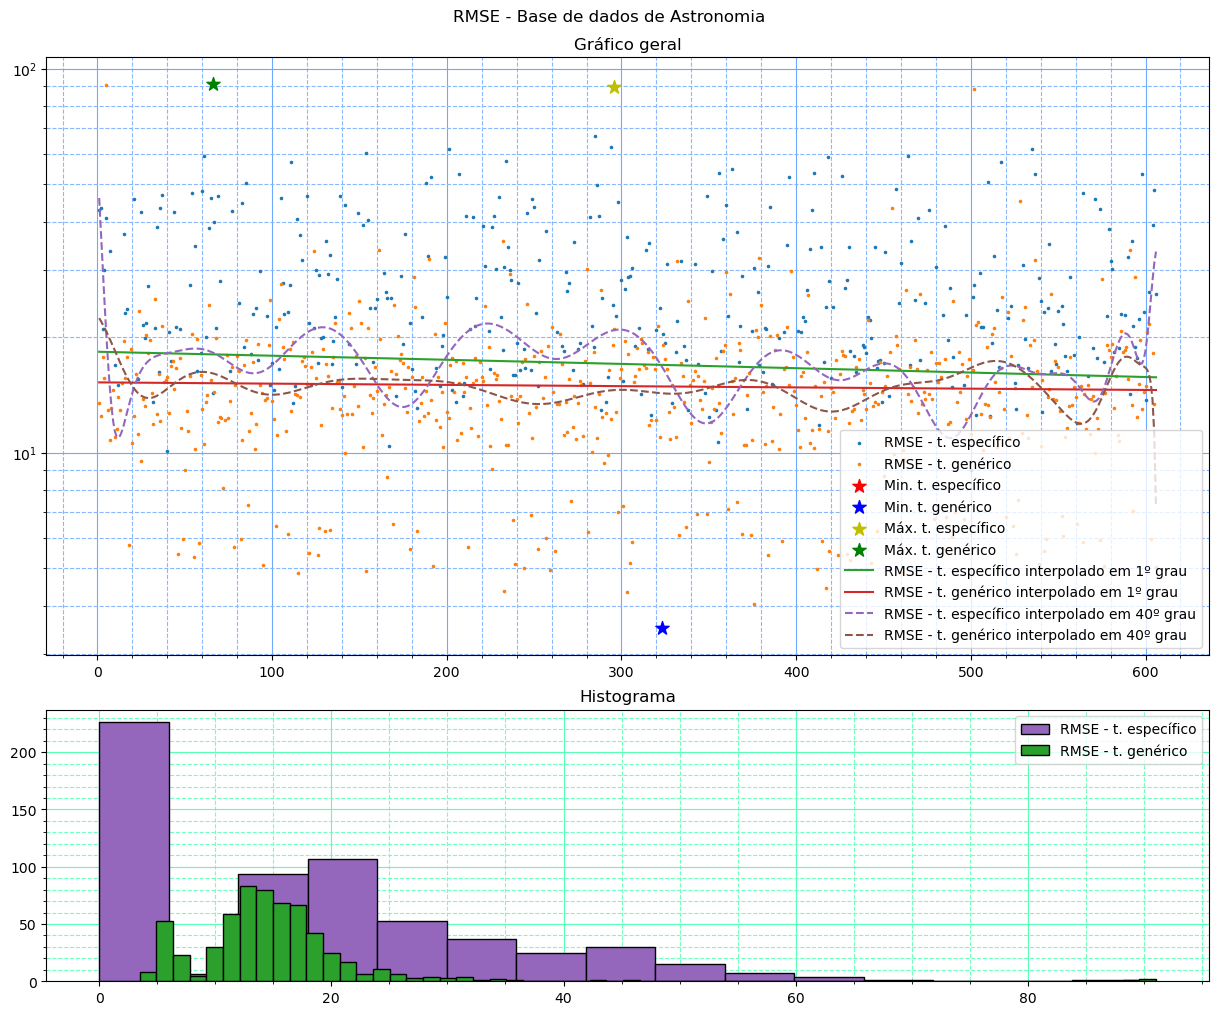

In [53]:
# RMSE - Astronomy

key = 'rmse'

size_tick_min_max = 100
size_tick_scatter = 10

color_scatter_specific_training = '#1f77b4'
color_scatter_non_specific_training = '#ff7f0e'

color_plot_polynomium_1_deg_specific_training = '#2ca02c'
color_plot_polynomium_1_deg_non_specific_training = '#d62728'

color_plot_polynomium_60_deg_specific_training = '#9467bd'
color_plot_polynomium_60_deg_non_specific_training = '#8c564b'

color_histogram_specific_training = '#9467bd'
color_histogram_non_specific_training = '#2ca02c'


fig = plt.figure(figsize=(15,12))

fig.suptitle('RMSE - Base de dados de Astronomia', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_specific_training, label='RMSE - t. específico')
ax1.scatter(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_non_specific_training, label='RMSE - t. genérico')

min_x_specific_training = np.argmin(df_astronomy_specific_training[key]) + 1
min_y_specific_training = np.min(df_astronomy_specific_training[key])

min_x_non_specific_training = np.argmin(df_astronomy_non_specific_training[key]) + 1
min_y_non_specific_training = np.min(df_astronomy_non_specific_training[key])

max_x_specific_training = np.argmax(df_astronomy_specific_training[key]) + 1
max_y_specific_training = np.max(df_astronomy_specific_training[key])

max_x_non_specific_training = np.argmax(df_astronomy_non_specific_training[key]) + 1
max_y_non_specific_training = np.max(df_astronomy_non_specific_training[key])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='Máx. t. genérico')

m_astronomy_specific_training, b_astronomy_specific_training = np.polyfit(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], 1)
m_astronomy_non_specific_training, b_astronomy_non_specific_training = np.polyfit(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_astronomy_specific_training = np.poly1d(np.polyfit(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], 40))
    polynomium_astronomy_non_specific_training = np.poly1d(np.polyfit(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], 40))

ax1.plot(df_astronomy_specific_training['index'], m_astronomy_specific_training*df_astronomy_specific_training['index'] + b_astronomy_specific_training, color=color_plot_polynomium_1_deg_specific_training, label='RMSE - t. específico interpolado em 1º grau')
ax1.plot(df_astronomy_non_specific_training['index'], m_astronomy_non_specific_training*df_astronomy_non_specific_training['index'] + b_astronomy_non_specific_training, color=color_plot_polynomium_1_deg_non_specific_training, label='RMSE - t. genérico interpolado em 1º grau')

ax1.plot(df_astronomy_specific_training['index'], polynomium_astronomy_specific_training(df_astronomy_specific_training['index']), '--', color=color_plot_polynomium_60_deg_specific_training, label='RMSE - t. específico interpolado em 40º grau')
ax1.plot(df_astronomy_specific_training['index'], polynomium_astronomy_non_specific_training(df_astronomy_specific_training['index']), '--', color=color_plot_polynomium_60_deg_non_specific_training, label='RMSE - t. genérico interpolado em 40º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_astronomy_specific_training[key], bins='auto', color=color_histogram_specific_training, label='RMSE - t. específico', edgecolor='black')
_ = ax2.hist(df_astronomy_non_specific_training[key], bins='auto', color=color_histogram_non_specific_training, label='RMSE - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('rmse_astronomy_compound.svg')
plt.savefig('rmse_astronomy_compound.pdf')

plt.show()

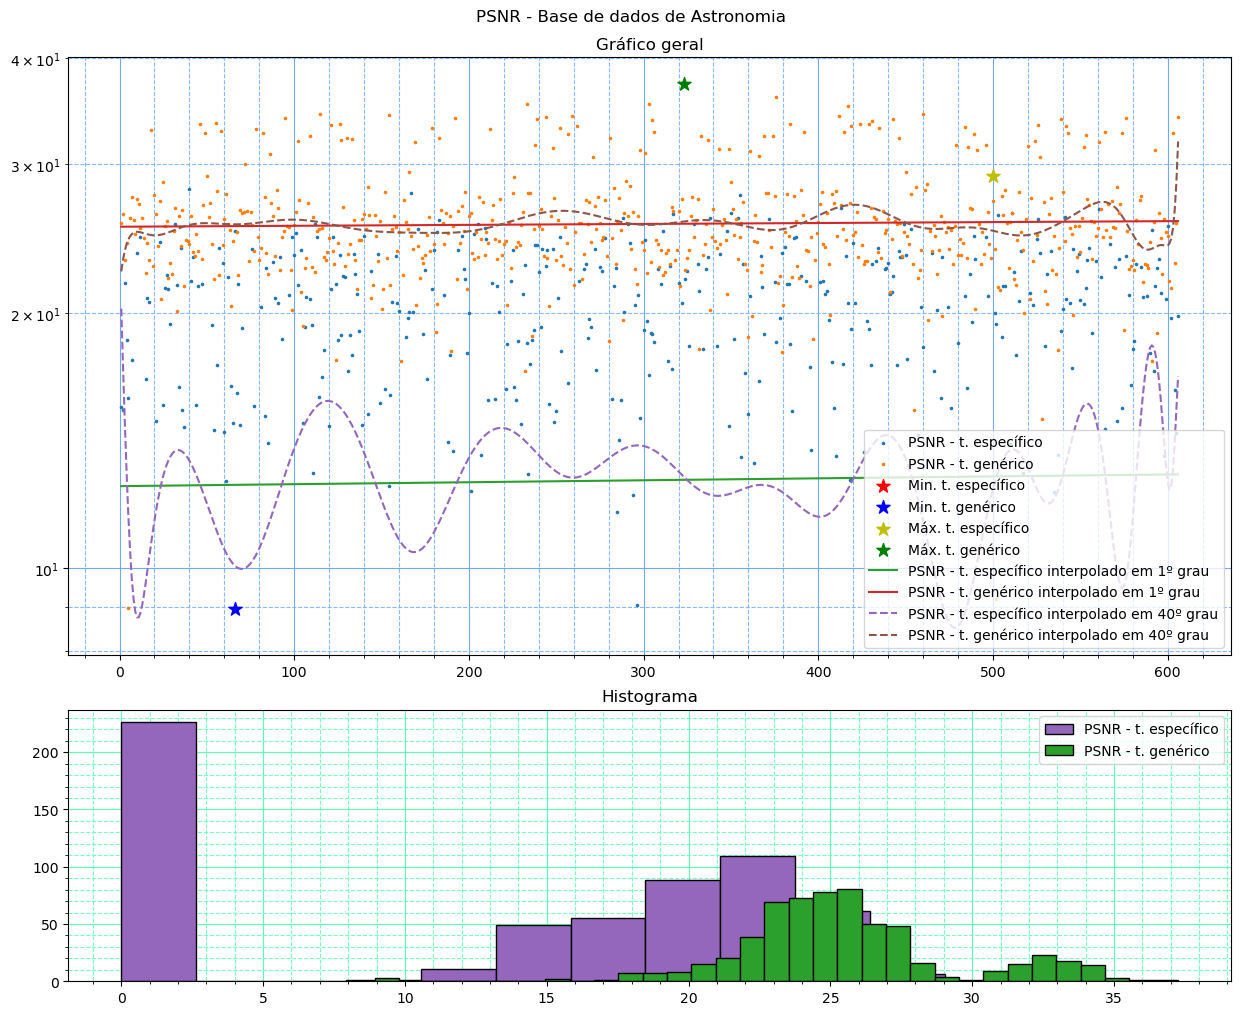

In [52]:
# PSNR - Astronomy

key = 'psnr'

size_tick_min_max = 100
size_tick_scatter = 10

color_scatter_specific_training = '#1f77b4'
color_scatter_non_specific_training = '#ff7f0e'

color_plot_polynomium_1_deg_specific_training = '#2ca02c'
color_plot_polynomium_1_deg_non_specific_training = '#d62728'

color_plot_polynomium_60_deg_specific_training = '#9467bd'
color_plot_polynomium_60_deg_non_specific_training = '#8c564b'

color_histogram_specific_training = '#9467bd'
color_histogram_non_specific_training = '#2ca02c'


fig = plt.figure(figsize=(15,12))

fig.suptitle('PSNR - Base de dados de Astronomia', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_specific_training, label='PSNR - t. específico')
ax1.scatter(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_non_specific_training, label='PSNR - t. genérico')

min_x_specific_training = np.argmin(df_astronomy_specific_training[key]) + 1
min_y_specific_training = np.min(df_astronomy_specific_training[key])

min_x_non_specific_training = np.argmin(df_astronomy_non_specific_training[key]) + 1
min_y_non_specific_training = np.min(df_astronomy_non_specific_training[key])

max_x_specific_training = np.argmax(df_astronomy_specific_training[key]) + 1
max_y_specific_training = np.max(df_astronomy_specific_training[key])

max_x_non_specific_training = np.argmax(df_astronomy_non_specific_training[key]) + 1
max_y_non_specific_training = np.max(df_astronomy_non_specific_training[key])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='Máx. t. genérico')

m_astronomy_specific_training, b_astronomy_specific_training = np.polyfit(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], 1)
m_astronomy_non_specific_training, b_astronomy_non_specific_training = np.polyfit(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_astronomy_specific_training = np.poly1d(np.polyfit(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], 40))
    polynomium_astronomy_non_specific_training = np.poly1d(np.polyfit(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], 40))

ax1.plot(df_astronomy_specific_training['index'], m_astronomy_specific_training*df_astronomy_specific_training['index'] + b_astronomy_specific_training, color=color_plot_polynomium_1_deg_specific_training, label='PSNR - t. específico interpolado em 1º grau')
ax1.plot(df_astronomy_non_specific_training['index'], m_astronomy_non_specific_training*df_astronomy_non_specific_training['index'] + b_astronomy_non_specific_training, color=color_plot_polynomium_1_deg_non_specific_training, label='PSNR - t. genérico interpolado em 1º grau')

ax1.plot(df_astronomy_specific_training['index'], polynomium_astronomy_specific_training(df_astronomy_specific_training['index']), '--', color=color_plot_polynomium_60_deg_specific_training, label='PSNR - t. específico interpolado em 40º grau')
ax1.plot(df_astronomy_specific_training['index'], polynomium_astronomy_non_specific_training(df_astronomy_specific_training['index']), '--', color=color_plot_polynomium_60_deg_non_specific_training, label='PSNR - t. genérico interpolado em 40º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_astronomy_specific_training[key], bins='auto', color=color_histogram_specific_training, label='PSNR - t. específico', edgecolor='black')
_ = ax2.hist(df_astronomy_non_specific_training[key], bins='auto', color=color_histogram_non_specific_training, label='PSNR - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('psnr_astronomy_compound.svg')
plt.savefig('psnr_astronomy_compound.pdf')

plt.show()

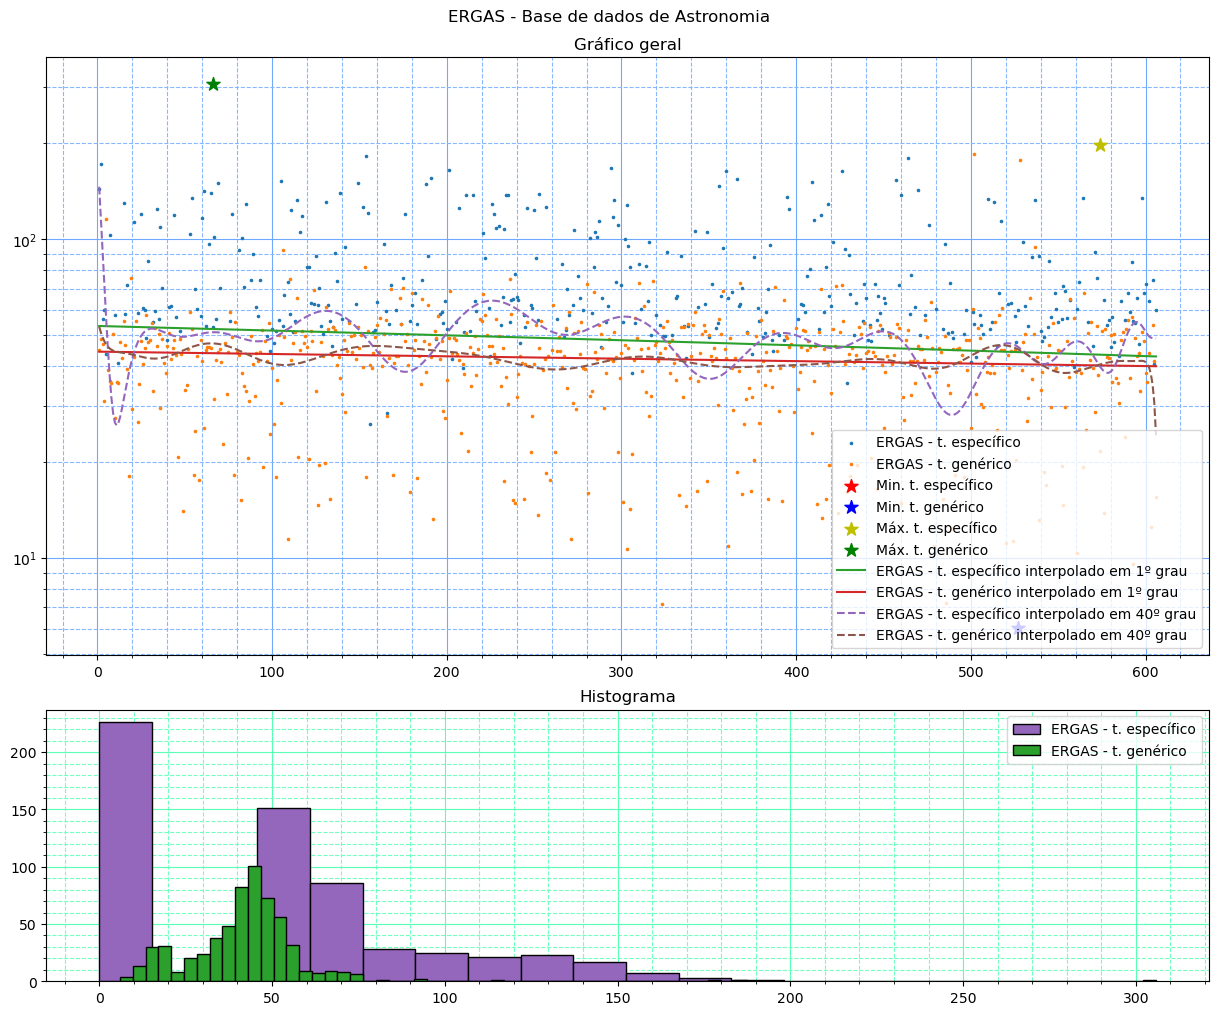

In [54]:
# ERGAS - Astronomy

key = 'ergas'

size_tick_min_max = 100
size_tick_scatter = 10

color_scatter_specific_training = '#1f77b4'
color_scatter_non_specific_training = '#ff7f0e'

color_plot_polynomium_1_deg_specific_training = '#2ca02c'
color_plot_polynomium_1_deg_non_specific_training = '#d62728'

color_plot_polynomium_60_deg_specific_training = '#9467bd'
color_plot_polynomium_60_deg_non_specific_training = '#8c564b'

color_histogram_specific_training = '#9467bd'
color_histogram_non_specific_training = '#2ca02c'


fig = plt.figure(figsize=(15,12))

fig.suptitle('ERGAS - Base de dados de Astronomia', y=0.92)

gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])


# General plot

ax1.set_title('Gráfico geral')

ax1.set_yscale("log")

ax1.scatter(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_specific_training, label='ERGAS - t. específico')
ax1.scatter(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], marker='.', s=size_tick_scatter, color=color_scatter_non_specific_training, label='ERGAS - t. genérico')

min_x_specific_training = np.argmin(df_astronomy_specific_training[key]) + 1
min_y_specific_training = np.min(df_astronomy_specific_training[key])

min_x_non_specific_training = np.argmin(df_astronomy_non_specific_training[key]) + 1
min_y_non_specific_training = np.min(df_astronomy_non_specific_training[key])

max_x_specific_training = np.argmax(df_astronomy_specific_training[key]) + 1
max_y_specific_training = np.max(df_astronomy_specific_training[key])

max_x_non_specific_training = np.argmax(df_astronomy_non_specific_training[key]) + 1
max_y_non_specific_training = np.max(df_astronomy_non_specific_training[key])

ax1.scatter(min_x_specific_training, min_y_specific_training, marker='*', s=size_tick_min_max, c='r', label='Min. t. específico')
ax1.scatter(min_x_non_specific_training, min_y_non_specific_training, marker='*', s=size_tick_min_max, c='b', label='Min. t. genérico')
ax1.scatter(max_x_specific_training, max_y_specific_training, marker='*', s=size_tick_min_max, c='y', label='Máx. t. específico')
ax1.scatter(max_x_non_specific_training, max_y_non_specific_training, marker='*', s=size_tick_min_max, c='g', label='Máx. t. genérico')

m_astronomy_specific_training, b_astronomy_specific_training = np.polyfit(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], 1)
m_astronomy_non_specific_training, b_astronomy_non_specific_training = np.polyfit(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], 1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    polynomium_astronomy_specific_training = np.poly1d(np.polyfit(df_astronomy_specific_training['index'], df_astronomy_specific_training[key], 40))
    polynomium_astronomy_non_specific_training = np.poly1d(np.polyfit(df_astronomy_non_specific_training['index'], df_astronomy_non_specific_training[key], 40))

ax1.plot(df_astronomy_specific_training['index'], m_astronomy_specific_training*df_astronomy_specific_training['index'] + b_astronomy_specific_training, color=color_plot_polynomium_1_deg_specific_training, label='ERGAS - t. específico interpolado em 1º grau')
ax1.plot(df_astronomy_non_specific_training['index'], m_astronomy_non_specific_training*df_astronomy_non_specific_training['index'] + b_astronomy_non_specific_training, color=color_plot_polynomium_1_deg_non_specific_training, label='ERGAS - t. genérico interpolado em 1º grau')

ax1.plot(df_astronomy_specific_training['index'], polynomium_astronomy_specific_training(df_astronomy_specific_training['index']), '--', color=color_plot_polynomium_60_deg_specific_training, label='ERGAS - t. específico interpolado em 40º grau')
ax1.plot(df_astronomy_specific_training['index'], polynomium_astronomy_non_specific_training(df_astronomy_specific_training['index']), '--', color=color_plot_polynomium_60_deg_non_specific_training, label='ERGAS - t. genérico interpolado em 40º grau')

ax1.grid(which='major', color='#6ea9ff', linestyle='-')
ax1.grid(which='minor', color='#87b8ff', linestyle='--')

ax1.legend(loc="lower right")
ax1.minorticks_on()
ax1.set_axisbelow(True)




# Histogram specific training

ax2.set_title('Histograma')

ax2.grid(which='major', color='#59ffb4', linestyle='-')
ax2.grid(which='minor', color='#73ffc0', linestyle='--')

ax2.minorticks_on()

_ = ax2.hist(df_astronomy_specific_training[key], bins='auto', color=color_histogram_specific_training, label='ERGAS - t. específico', edgecolor='black')
_ = ax2.hist(df_astronomy_non_specific_training[key], bins='auto', color=color_histogram_non_specific_training, label='ERGAS - t. genérico', edgecolor='black')

ax2.legend(loc="upper right")

ax2.set_axisbelow(True)





plt.savefig('ergas_astronomy_compound.svg')
plt.savefig('ergas_astronomy_compound.pdf')

plt.show()